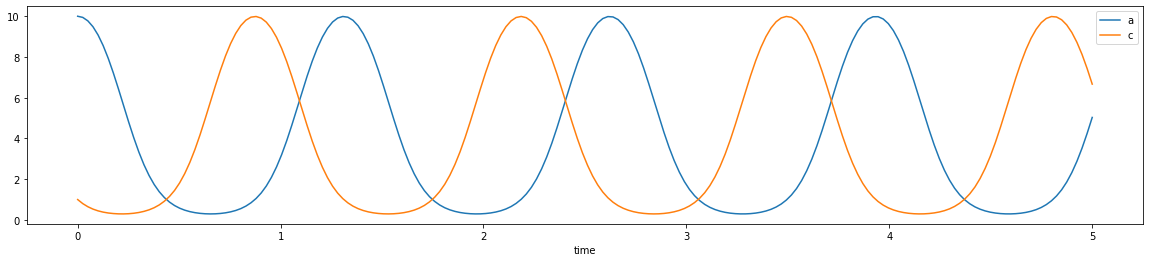

In [1]:
# plot solution to rock-paper-scissors (RPS) oscillator described by these chemical reactions:
# A+B -> 2B
# B+C -> 2C
# C+A -> 2A

import sympy
import gpac
import numpy as np

a,b,c = sympy.symbols('a b c')

odes = {
    a: -a*b + c*a,
    b: -b*c + a*b,
    c: -c*a + b*c,
}
initial_values = {
    'a': 10,
    b: 1,
    c: 1,
}
t_eval = np.linspace(0, 5, 200)

gpac.plot(odes, initial_values, t_eval=t_eval, figure_size=(20,4), symbols_to_plot=[a,c])

In [2]:
# print solution to rock-paper-scissors (RPS) oscillator described by these chemical reactions:
# A+B -> 2B
# B+C -> 2C
# C+A -> 2A

import sympy
import gpac
import numpy as np

a,b,c = sympy.symbols('a b c')

odes = {
    a: -a*b + c*a,
    b: -b*c + a*b,
    c: -c*a + b*c,
}
initial_values = {
    a: 10,
    b: 1,
    c: 1,
}
t_eval = np.linspace(0, 1, 5)

solution = gpac.integrate_odes(odes, initial_values, t_eval=t_eval)
print(f'times = {solution.t}')
print(f'a = {solution.y[0]}')
print(f'b = {solution.y[1]}')
print(f'c = {solution.y[2]}')

times = [0.   0.25 0.5  0.75 1.  ]
a = [10.          4.84701622  0.58753815  0.38765743  3.07392998]
b = [1.         6.84903338 9.63512628 3.03634559 0.38421121]
c = [1.         0.3039504  1.77733557 8.57599698 8.54185881]


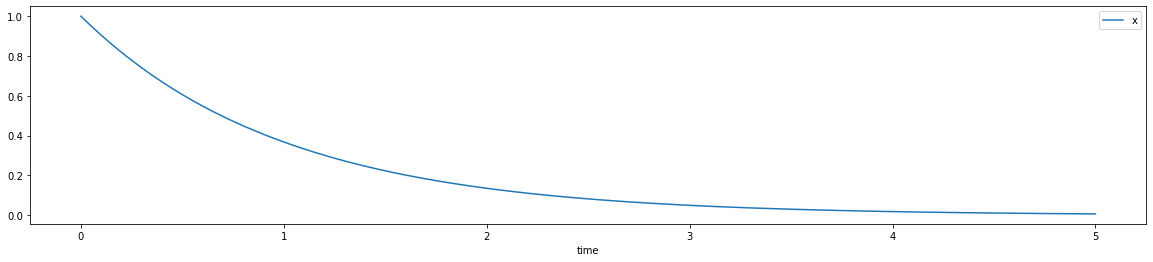

In [3]:
# exponential decay

import sympy
import gpac
import numpy as np

x = sympy.symbols('x')

odes = {
    x: -x,
}
initial_values = {
    x: 1,
}
t_eval = np.linspace(0, 5, 200)

gpac.plot(odes, initial_values, t_eval=t_eval, figure_size=(20,4))

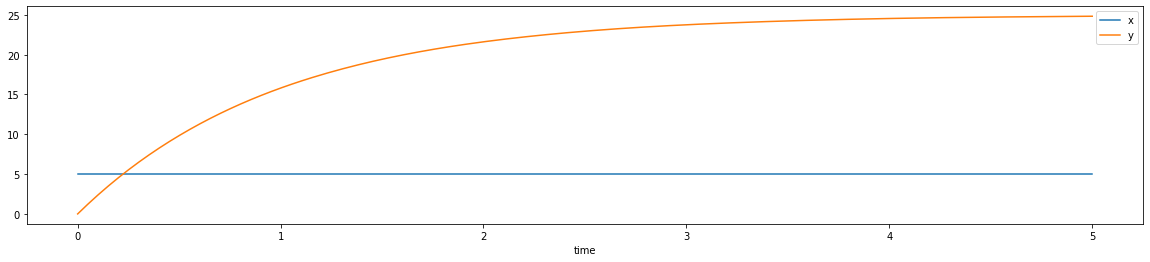

In [2]:
# plot solution to ODEs of this CRN that computes f(x) = x^2
# 2X -> 2X+Y
# Y -> nothing

import sympy
import gpac
import numpy as np

x,y = sympy.symbols('x y')

odes = {
    x: 0,
    y: x**2 - y,
}
initial_values = {
    x: 5,
}
t_eval = np.linspace(0, 5, 200)

gpac.plot(odes, initial_values, t_eval=t_eval, figure_size=(20,4), symbols_to_plot=[x,y])

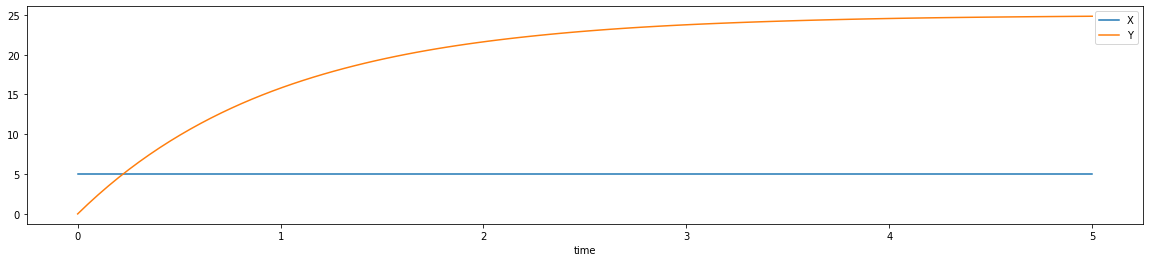

times = [0.   1.25 2.5  3.75 5.  ]
X = [5. 5. 5. 5. 5.]
Y = [ 0.         17.83557385 22.94880382 24.412418   24.82758534]
ODEs for reactions:
X' = 0
Y' = X**2 - Y


In [8]:
# plot solution to ODEs of this CRN that computes f(x) = x^2, using the gpac.crn module
# 2X -> 2X+Y
# Y -> nothing

import gpac
import numpy as np

x,y = gpac.species('X Y')
rxns = [
    x+x >> x+x+y,
    y >> gpac.empty,
]
initial_values = {x:5}
t_eval = np.linspace(0, 5, 100)

# plot trajectory of concentrations
gpac.plot_crn(rxns, initial_values, t_eval=t_eval, figure_size=(20,4))

# print some values along trajectory
solution = gpac.integrate_crn_odes(rxns, initial_values, t_eval=np.linspace(0, 5, 5))
print(f'times = {solution.t}')
print(f'X = {solution.y[0]}')
print(f'Y = {solution.y[1]}')

# print ODEs associated with reactions
print(f'ODEs for reactions:')
odes = gpac.crn_to_odes(rxns)
for symbol, ode in odes.items():
    print(f"{symbol}' = {ode}")

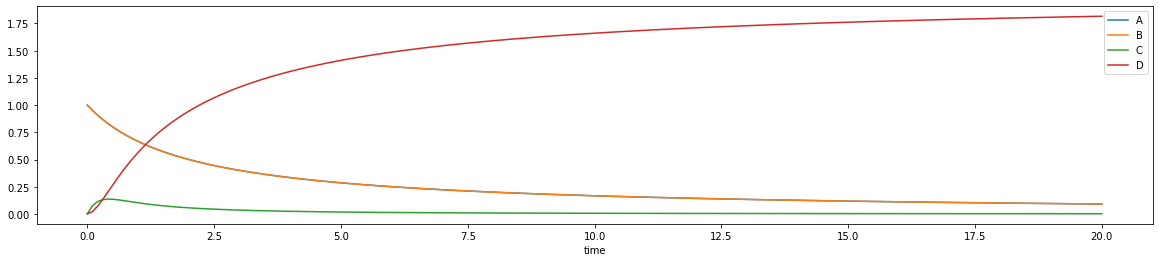

In [9]:
# examples of additional CRN notation
# You can specify reversible reactions, and rate constants in each direction

# This encodes the CRN
# A+B --0.5--> 2C
# 2C   --4-->  A+B
# C    --5-->  D
# Where the first two reactions are specified as a reversible reaction using | instead of >>
# k means the forward rate constant, r means the reverse rate constant
a,b,c,d = gpac.species('A B C D')
rxns = [
    (a+b | 2*c).k(0.5).r(4), 
    (c >> d).k(5)
]
initial_values = {a:1, b:1}
t_eval = np.linspace(0, 20, 200)
gpac.plot_crn(rxns, initial_values, t_eval=t_eval, figure_size=(20,4))